In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

sns.set(style="whitegrid")


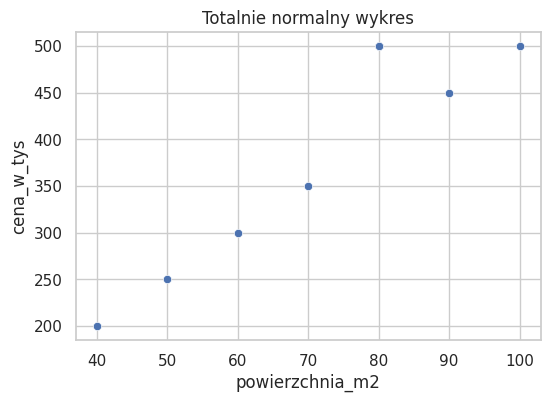

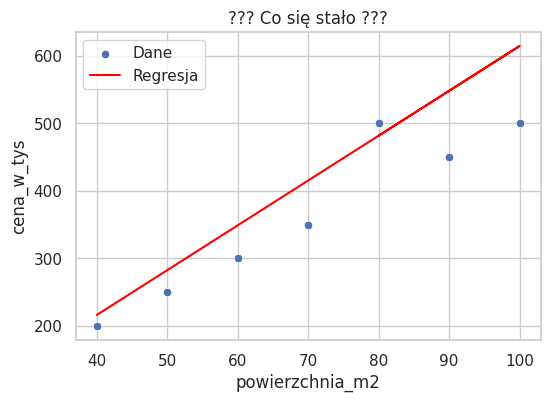

In [3]:
df = pd.DataFrame({
    "powierzchnia_m2": [40, 50, 60, 70, 80, 90, 100] + [80]*20,
    "cena_w_tys": [200, 250, 300, 350, 500, 450, 500] + [500]*20
})

# Wykres
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="powierzchnia_m2", y="cena_w_tys")
plt.title("Totalnie normalny wykres")
plt.show()

# Regresja
X = df[["powierzchnia_m2"]]
y = df["cena_w_tys"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="powierzchnia_m2", y="cena_w_tys", data=df, label="Dane")
plt.plot(df["powierzchnia_m2"], y_pred, color="red", label="Regresja")
plt.title("??? Co się stało ???")
plt.legend()
plt.show()


   powierzchnia_m2  cena_w_tys
0             40.0       200.0
1             60.0       300.0
2              NaN       350.0
3             80.0         NaN


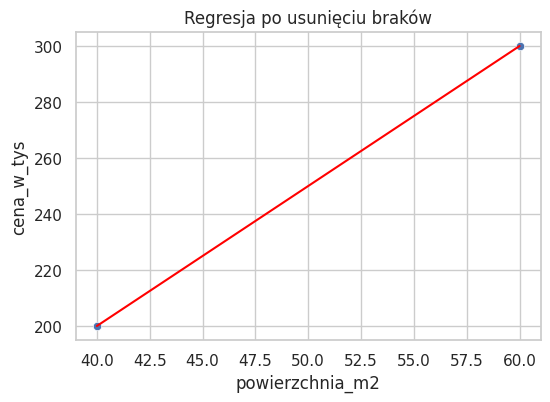

In [4]:
df_nan = pd.DataFrame({
    "powierzchnia_m2": [40, 60, np.nan, 80],
    "cena_w_tys": [200, 300, 350, np.nan]
})

print(df_nan)
# Pytanie: "Czy da się tu zrobić model regresji?"

# Konieczne usunięcie braków
df_nan_clean = df_nan.dropna()

# Regresja
X = df_nan_clean[["powierzchnia_m2"]]
y = df_nan_clean["cena_w_tys"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="powierzchnia_m2", y="cena_w_tys", data=df_nan_clean)
plt.plot(X, y_pred, color="red")
plt.title("Regresja po usunięciu braków")
plt.show()

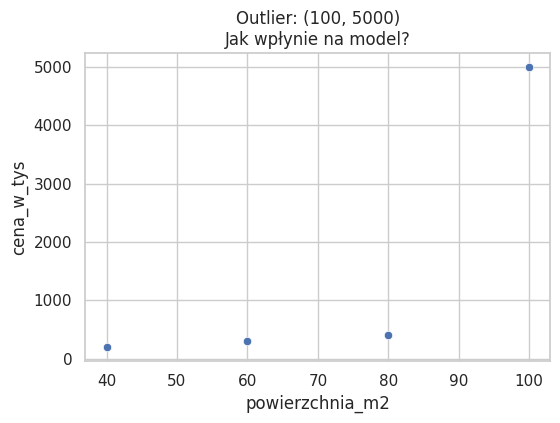

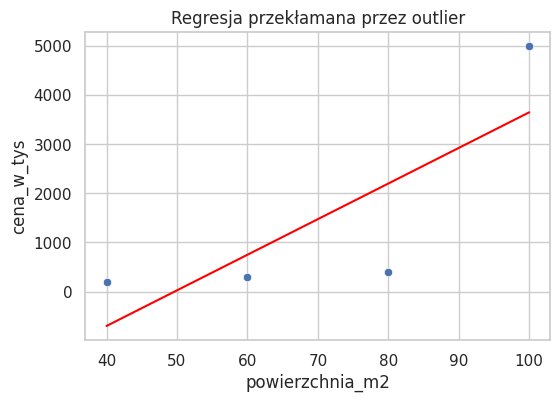

In [ ]:
df_outlier = pd.DataFrame({
    "powierzchnia_m2": [40, 60, 80, 100],
    "cena_w_tys": [200, 300, 400, 5000]  # ostatni outlier!
})

# Wizualizacja
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_outlier, x="powierzchnia_m2", y="cena_w_tys")
plt.title("Outlier: (100, 5000)\nJak wpłynie na model?")
plt.show()

# Regresja
X = df_outlier[["powierzchnia_m2"]]
y = df_outlier["cena_w_tys"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="powierzchnia_m2", y="cena_w_tys", data=df_outlier)
plt.plot(X, y_pred, color="red")
plt.title("Regresja przekłamana przez outlier")
plt.show()


  powierzchnia_m2  cena_w_tys
0              40         200
1              60         300
2   osiemdziesiąt         400
   powierzchnia_m2  cena_w_tys
0             40.0         200
1             60.0         300
2              NaN         400


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


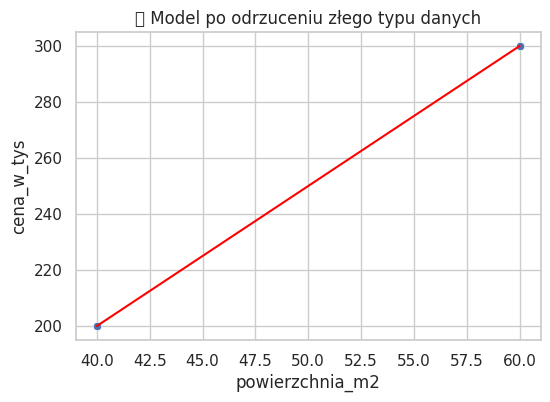

In [ ]:
df_typ = pd.DataFrame({
    "powierzchnia_m2": [40, 60, "osiemdziesiąt"],
    "cena_w_tys": [200, 300, 400]
})

print(df_typ)

# Konwersja z błędem
df_typ["powierzchnia_m2"] = pd.to_numeric(df_typ["powierzchnia_m2"], errors="coerce")

print(df_typ)
# Usuwanie NaN
df_typ_clean = df_typ.dropna()

# Regresja
X = df_typ_clean[["powierzchnia_m2"]]
y = df_typ_clean["cena_w_tys"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="powierzchnia_m2", y="cena_w_tys", data=df_typ_clean)
plt.plot(X, y_pred, color="red")
plt.title("📝 Model po odrzuceniu złego typu danych")
plt.show()

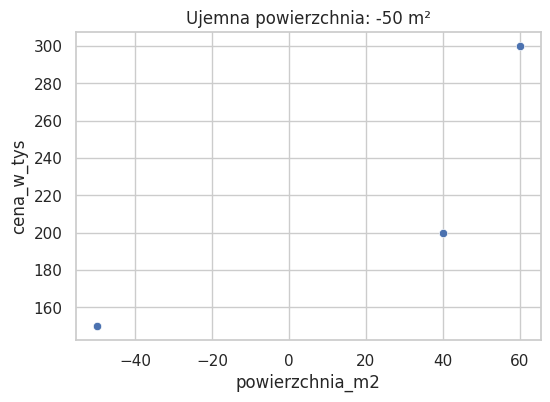

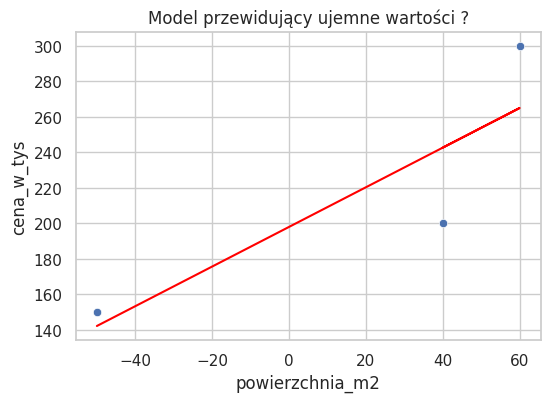

In [ ]:
df_neg = pd.DataFrame({
    "powierzchnia_m2": [40, 60, -50],
    "cena_w_tys": [200, 300, 150]
})

# Pokaż wszystkie dane
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_neg, x="powierzchnia_m2", y="cena_w_tys")
plt.title("Ujemna powierzchnia: -50 m²")
plt.show()


X = df_neg[["powierzchnia_m2"]]
y = df_neg[["cena_w_tys"]]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="powierzchnia_m2", y="cena_w_tys", data=df_neg)
plt.plot(X, y_pred, color="red")
plt.title("Model przewidujący ujemne wartości ?")
plt.show()



## 📌 1. Wprowadzenie – Czym są brudne dane?

**Brudne dane** to dane, które zawierają błędy, są niekompletne, niespójne lub w jakiś sposób niewłaściwe do analizy.

Typowe problemy:
- Brakujące wartości
- Duplikaty
- Błędy typograficzne
- Nielogiczne wartości (np. ujemna liczba pokoi)
- Inne formaty danych (np. liczby jako tekst)


## 🧹 2. Czyszczenie danych

In [16]:
data = {
    'powierzchnia_m2': [50, 60, np.nan, 80, 100, 120, 150, 200, 250, 'brak', 90, 75],
    'cena_w_tys': [250, 300, 320, 400, 500, np.nan, 700, 800, '??', 1000, 450, 380]
}

df = pd.DataFrame(data)
df

,powierzchnia_m2,cena_w_tys
0,50,250
1,60,300
2,NaN,320
3,80,400
4,100,500
5,120,NaN
6,150,700
7,200,800
8,250,??
9,brak,1000


In [17]:
print(df.info())
print("\nBraki danych:")
print(df.isnull().sum())

# Sprawdzamy nietypowe wartości
print("\nNietypowe wpisy w kolumnach:")
print(df['powierzchnia_m2'].unique())
print(df['cena_w_tys'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   powierzchnia_m2  11 non-null     object
 1   cena_w_tys       11 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None

Braki danych:
powierzchnia_m2    1
cena_w_tys         1
dtype: int64

Nietypowe wpisy w kolumnach:
[50 60 nan 80 100 120 150 200 250 'brak' 90 75]
[250 300 320 400 500 nan 700 800 '??' 1000 450 380]


### 2.1 Naprawa typów danych

In [18]:

# Zamiana "brak" i "??" na NaN
df['powierzchnia_m2'] = pd.to_numeric(df['powierzchnia_m2'], errors='coerce')
df['cena_w_tys'] = pd.to_numeric(df['cena_w_tys'], errors='coerce')

# Sprawdzamy ponownie
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   powierzchnia_m2  10 non-null     float64
 1   cena_w_tys       10 non-null     float64
dtypes: float64(2)
memory usage: 324.0 bytes


### 2.2 Usunięcie duplikatów

In [19]:
# Usunięcie duplikatów
df = df.drop_duplicates()
df


,powierzchnia_m2,cena_w_tys
0,50.0,250.0
1,60.0,300.0
2,NaN,320.0
3,80.0,400.0
4,100.0,500.0
5,120.0,NaN
6,150.0,700.0
7,200.0,800.0
8,250.0,NaN
9,NaN,1000.0


### 2.3 Uzupełnianie brakujących danych

In [20]:

# Sprawdźmy ile brakuje
df.isnull().sum()


,0
powierzchnia_m2,2
cena_w_tys,2



Mamy kilka możliwości:

- Usunąć brakujące wiersze
- Uzupełnić brakujące dane średnią lub medianą


In [21]:

# Opcja 1: Usunięcie
df_dropped = df.dropna()

# Opcja 2: Uzupełnienie średnią
df_filled = df.copy()
df_filled['powierzchnia_m2'] = df_filled['powierzchnia_m2'].fillna(df_filled['powierzchnia_m2'].mean())
df_filled['cena_w_tys'] = df_filled['cena_w_tys'].fillna(df_filled['cena_w_tys'].mean())

df_dropped, df_filled


(    powierzchnia_m2  cena_w_tys
 0              50.0       250.0
 1              60.0       300.0
 3              80.0       400.0
 4             100.0       500.0
 6             150.0       700.0
 7             200.0       800.0
 10             90.0       450.0
 11             75.0       380.0,
     powierzchnia_m2  cena_w_tys
 0              50.0       250.0
 1              60.0       300.0
 2             117.5       320.0
 3              80.0       400.0
 4             100.0       500.0
 5             120.0       510.0
 6             150.0       700.0
 7             200.0       800.0
 8             250.0       510.0
 9             117.5      1000.0
 10             90.0       450.0
 11             75.0       380.0)

### 2.4 Usunięcie outlierów

In [26]:
# Usunięcie outlierów
df_filled = df_filled[df_filled['powierzchnia_m2'] < 300]

# Usunięcie ujemnych liczb
df_filled = df_filled[df_filled['cena_w_tys'] >= 0]
df_filled = df_filled[df_filled['powierzchnia_m2'] >= 0]
df_filled

,powierzchnia_m2,cena_w_tys
0,50.0,250.0
1,60.0,300.0
2,117.5,320.0
3,80.0,400.0
4,100.0,500.0
5,120.0,510.0
6,150.0,700.0
7,200.0,800.0
8,250.0,510.0
9,117.5,1000.0


## 📈 3. Regresja liniowa – jak wpływają brudne dane?

In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Funkcja do trenowania i oceny modelu
def train_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    print(f"R²: {r2_score(y, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y, y_pred):.2f}")

    # Wykres
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dane rzeczywiste')
    plt.plot(X, y_pred, color='red', label='Regresja')
    plt.xlabel("Powierzchnia (m²)")
    plt.ylabel("Cena (tys.)")
    plt.legend()
    plt.show()


### Model na danych z brakami (usuniętymi)

R²: 0.974
MSE: 815.86


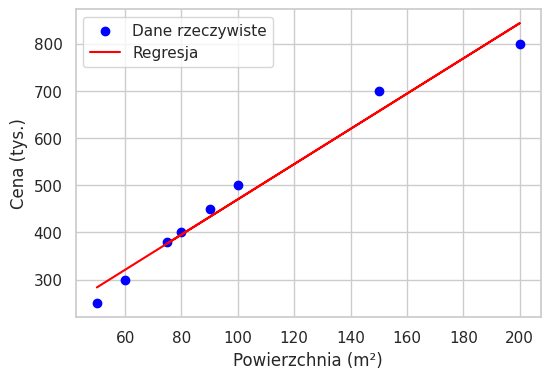

In [28]:

X = df_dropped[['powierzchnia_m2']]
y = df_dropped['cena_w_tys']

train_and_evaluate(X, y)


### Model na danych z uzupełnieniem średnią

R²: 0.250
MSE: 33819.99


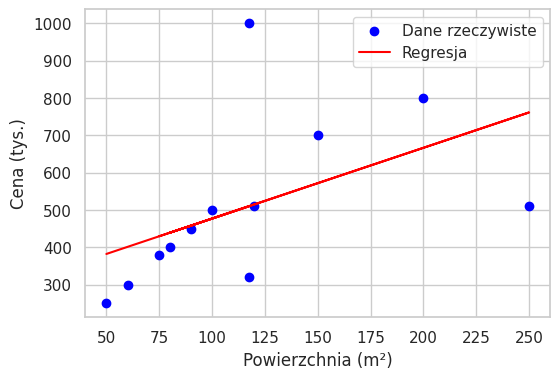

In [29]:

X = df_filled[['powierzchnia_m2']]
y = df_filled['cena_w_tys']

train_and_evaluate(X, y)


## 🤔 4. Wnioski


- Brudne dane mogą znacząco wpłynąć na wyniki modelu.
- Czyszczenie danych jest kluczowym krokiem w analizie danych.
- W niektórych przypadkach lepiej uzupełnić brakujące dane, w innych – je usunąć.
- podstawowe czyszczenie (Duplikaty, Błędy typograficzne, Inne formaty danych) są proste do naprawienia jednak największym problemem są braki danych / nielogiczne wartości